In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("card_trans_fraud_data.csv")

In [3]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [5]:
df.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [6]:
df["fraud"].value_counts()

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64

In [7]:
df.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [8]:
df.shape

(1000000, 8)

In [9]:
round((df["fraud"].value_counts()[1] / df.shape[0]*100), 5)

np.float64(8.7403)

In [10]:
average_by_fraud = df.groupby('fraud').mean()
print(average_by_fraud)

       distance_from_home  distance_from_last_transaction  \
fraud                                                       
0.0             22.832976                        4.301391   
1.0             66.261876                       12.712185   

       ratio_to_median_purchase_price  repeat_retailer  used_chip  \
fraud                                                               
0.0                          1.423642         0.881672   0.359402   
1.0                          6.006323         0.880119   0.256399   

       used_pin_number  online_order  
fraud                                 
0.0           0.109944      0.622225  
1.0           0.003123      0.946318  


In [11]:
print(df.max())
print(df.min())

distance_from_home                10632.723672
distance_from_last_transaction    11851.104565
ratio_to_median_purchase_price      267.802942
repeat_retailer                       1.000000
used_chip                             1.000000
used_pin_number                       1.000000
online_order                          1.000000
fraud                                 1.000000
dtype: float64
distance_from_home                0.004874
distance_from_last_transaction    0.000118
ratio_to_median_purchase_price    0.004399
repeat_retailer                   0.000000
used_chip                         0.000000
used_pin_number                   0.000000
online_order                      0.000000
fraud                             0.000000
dtype: float64


In [12]:
df.loc[df['fraud'] == 1.0, 'distance_from_home']

13          2.131956
24          3.803057
29         15.694986
35         26.711462
36         10.664474
             ...    
999908     45.296658
999916    167.139756
999919    124.640118
999939     51.412900
999949     15.724799
Name: distance_from_home, Length: 87403, dtype: float64

In [13]:
print(df.loc[df['fraud'] == 1.0, 'distance_from_home'].max())
print(df.loc[df['fraud'] == 1.0, 'distance_from_home'].min())

10632.723672241103
0.0258470156811057


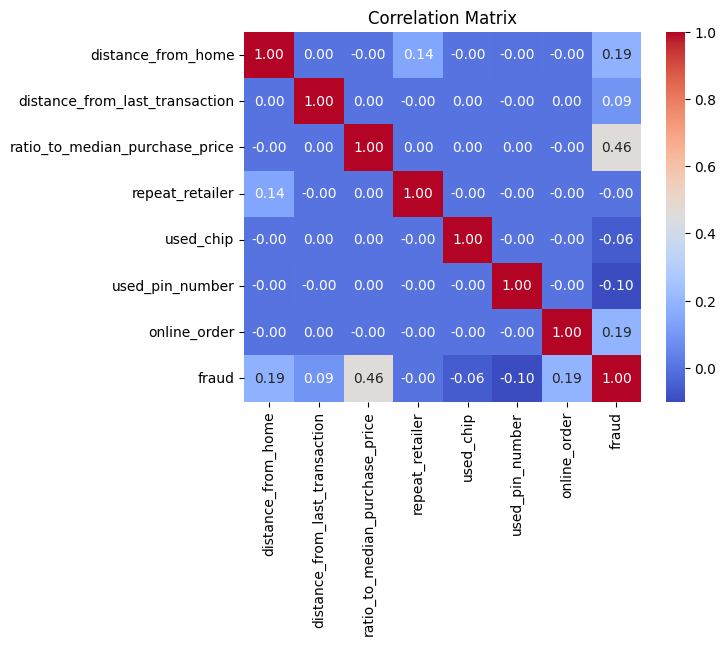

In [14]:
correlation_matrix = df[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price','repeat_retailer','used_chip','used_pin_number','online_order','fraud']].corr()
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

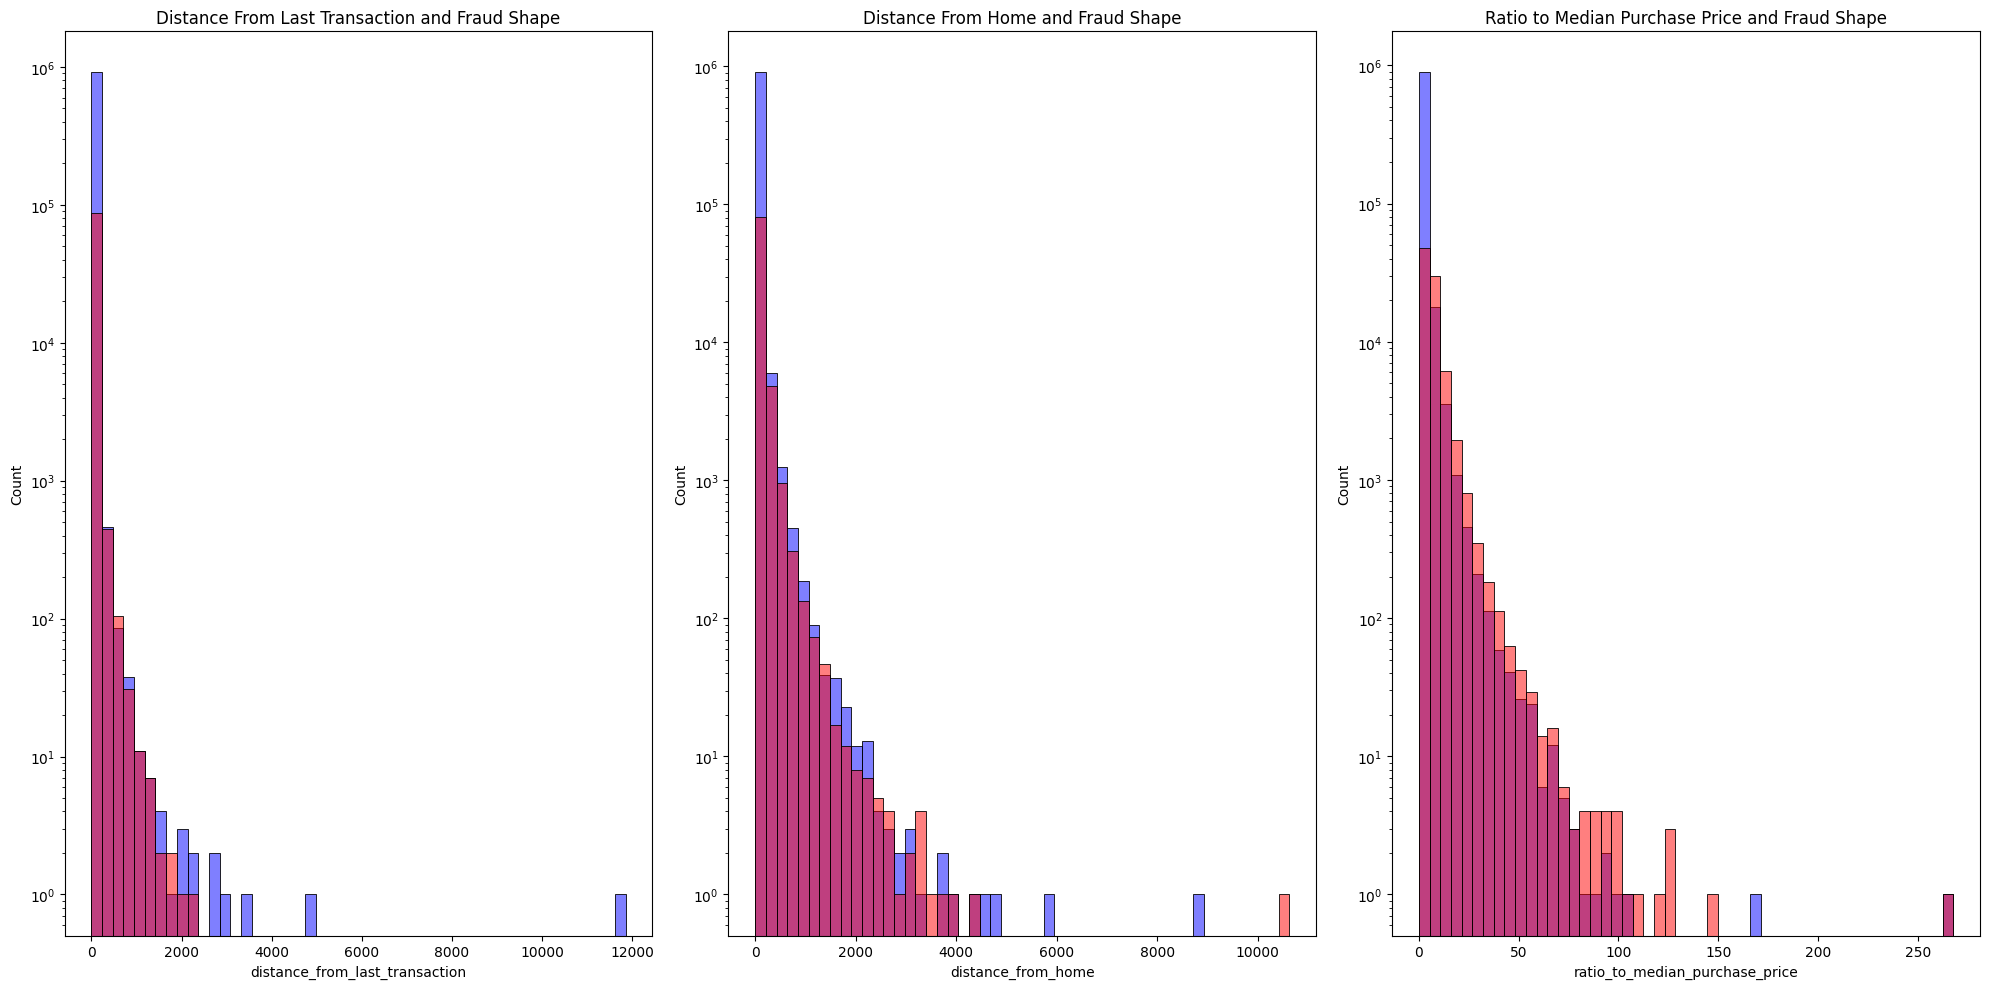

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))

fraud_trans_dist = df.loc[df['fraud'] == 1.0, 'distance_from_last_transaction']
not_fraud_trans_dist = df.loc[df['fraud'] == 0.0, 'distance_from_last_transaction']
trans_bins = np.histogram(np.hstack((fraud_trans_dist,not_fraud_trans_dist)), bins=50)[1]

fraud_home_dist = df.loc[df['fraud'] == 1.0, 'distance_from_home']
not_fraud_home_dist = df.loc[df['fraud'] == 0.0, 'distance_from_home']
home_bins = np.histogram(np.hstack((fraud_home_dist,not_fraud_home_dist)), bins=50)[1]

fraud_ratio = df.loc[df['fraud'] == 1.0, 'ratio_to_median_purchase_price']
not_fraud_ratio = df.loc[df['fraud'] == 0.0, 'ratio_to_median_purchase_price']
ratio_bins = np.histogram(np.hstack((fraud_ratio, not_fraud_ratio)), bins=50)[1]

axes[0].set_title('Distance From Last Transaction and Fraud Shape')
sns.histplot(not_fraud_trans_dist, bins=trans_bins, log=True, color='Blue', alpha=.5, ax=axes[0])
sns.histplot(fraud_trans_dist, bins=trans_bins, log=True, color='Red', alpha=.5, ax=axes[0])

axes[1].set_title('Distance From Home and Fraud Shape')
sns.histplot(not_fraud_home_dist, bins=home_bins, log=True, color='Blue', alpha=.5, ax=axes[1])
sns.histplot(fraud_home_dist, bins=home_bins, log=True, color='Red', alpha=.5, ax=axes[1])

axes[2].set_title('Ratio to Median Purchase Price and Fraud Shape')
sns.histplot(not_fraud_ratio, bins=ratio_bins, log=True, color='Blue', alpha=.5, ax=axes[2])
sns.histplot(fraud_ratio, bins=ratio_bins, log=True, color='Red', alpha=.5, ax=axes[2])

plt.tight_layout()
plt.show()

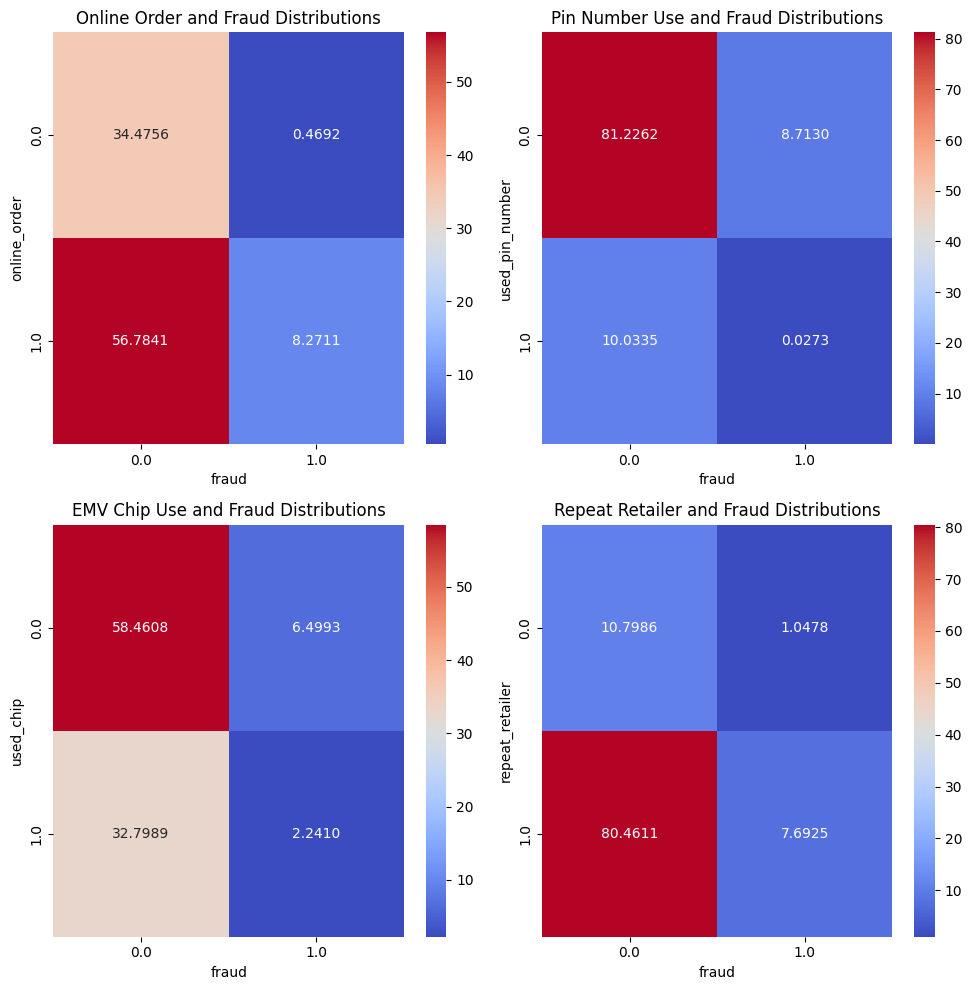

In [16]:
contingency_table = pd.crosstab(df['online_order'] , df['fraud'], normalize='all') * 100
contingency_table1 = pd.crosstab(df['used_pin_number'] , df['fraud'], normalize='all') * 100
contingency_table2 = pd.crosstab(df['used_chip'] , df['fraud'], normalize='all') * 100
contingency_table3 = pd.crosstab(df['repeat_retailer'] , df['fraud'], normalize='all') * 100

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

axes[0,0].set_title('Online Order and Fraud Distributions')
sns.heatmap(data=contingency_table, annot=True, cmap="coolwarm", fmt=".4f", ax=axes[0,0])

axes[0,1].set_title('Pin Number Use and Fraud Distributions')
sns.heatmap(data=contingency_table1, annot=True, cmap="coolwarm", fmt=".4f", ax=axes[0,1])

axes[1,0].set_title('EMV Chip Use and Fraud Distributions')
sns.heatmap(data=contingency_table2, annot=True, cmap="coolwarm", fmt=".4f", ax=axes[1,0])

axes[1,1].set_title('Repeat Retailer and Fraud Distributions')
sns.heatmap(data=contingency_table3, annot=True, cmap="coolwarm", fmt=".4f", ax=axes[1,1])

plt.tight_layout()
plt.show()

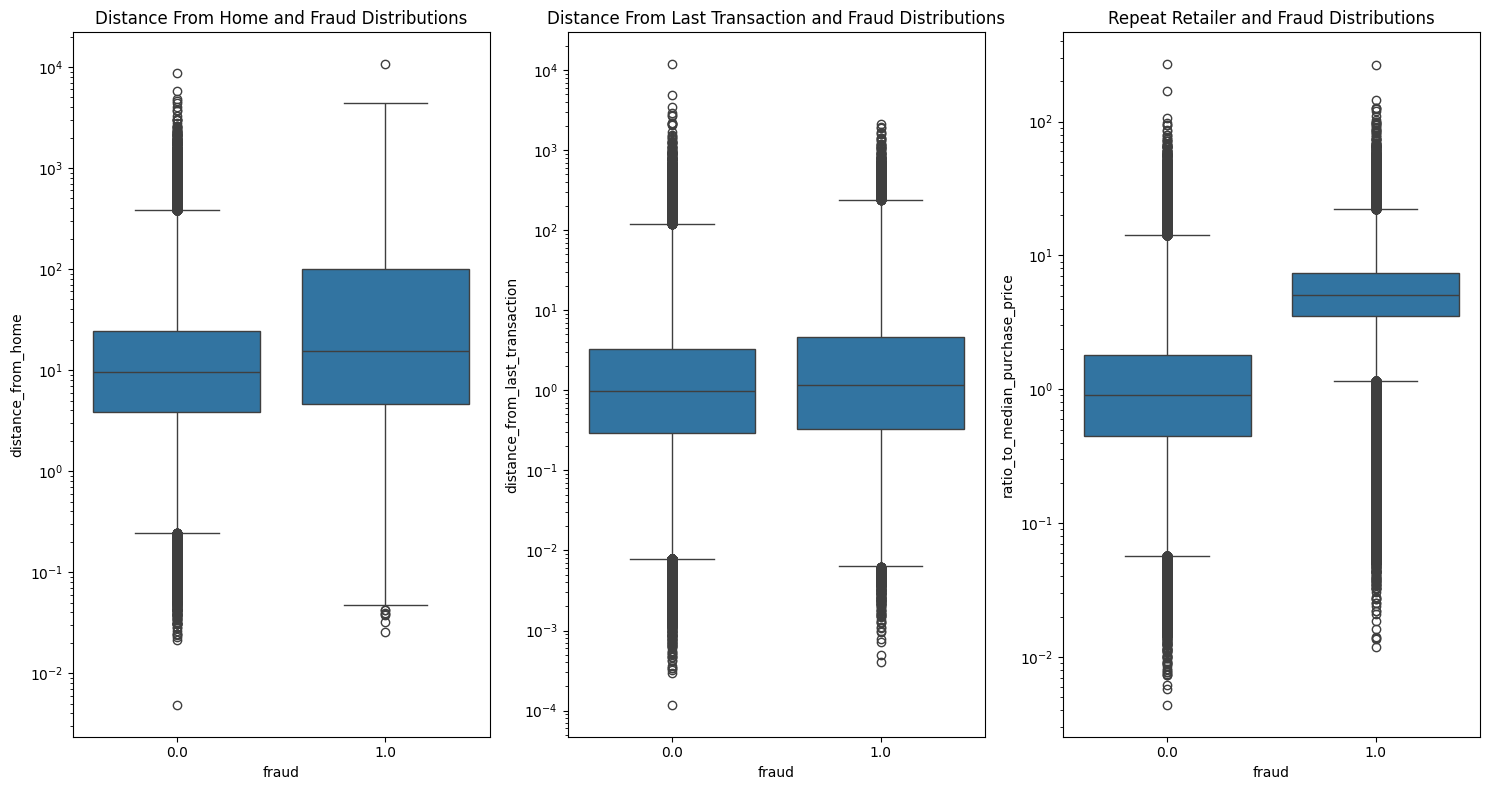

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

axes[0].set_title('Distance From Home and Fraud Distributions')
axes[0].set_yscale('log')
sns.boxplot(x='fraud', y='distance_from_home', data=df, ax=axes[0])

axes[1].set_title('Distance From Last Transaction and Fraud Distributions')
axes[1].set_yscale('log')
sns.boxplot(x='fraud', y='distance_from_last_transaction', data=df, ax=axes[1])

axes[2].set_title('Repeat Retailer and Fraud Distributions')
axes[2].set_yscale('log')
sns.boxplot(x='fraud', y='ratio_to_median_purchase_price', data=df, ax=axes[2])

plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [19]:
y = df['fraud']
X = df.drop('fraud', axis=1)

In [20]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.1, random_state=42) 
# test_size=0.1 means 10% for X_temp and y_temp, leaving 90% for X_train and y_train

In [21]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
# test_size=0.5 on X_temp (which is 10% of original) results in 5% for X_val and 5% for X_test

In [22]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
y_val_pred = log_model.predict(X_val)

In [24]:
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     45608
         1.0       0.89      0.60      0.72      4392

    accuracy                           0.96     50000
   macro avg       0.93      0.80      0.85     50000
weighted avg       0.96      0.96      0.95     50000



In [25]:
C = np.float64(10000.0)
log_model2 = LogisticRegression(max_iter=1000, class_weight='balanced', penalty='l2', C=C)
log_model2.fit(X_train,y_train)
y_val_pred = log_model2.predict(X_val)
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     45608
         1.0       0.58      0.95      0.72      4392

    accuracy                           0.94     50000
   macro avg       0.79      0.94      0.84     50000
weighted avg       0.96      0.94      0.94     50000



In [29]:
param_grid = [
    {'penalty':['l2'],
    'C' : np.logspace(-4,4,4),
    'solver': ['lbfgs','saga'],
    'max_iter'  : [1000,2500,5000],
    'class_weight': ['balanced', None]
}
]

In [30]:
from sklearn.model_selection import GridSearchCV
scoring = ['accuracy', 'precision','f1_macro','recall']
grid_search = GridSearchCV(log_model, param_grid=param_grid, cv=2, scoring=scoring, refit='f1_macro', verbose=True, n_jobs=-1)
grid_search

,estimator,LogisticRegre...max_iter=1000)
,param_grid,"[{'C': array([1.0000...00000000e+04]), 'class_weight': ['balanced', None], 'max_iter': [1000, 2500, ...], 'penalty': ['l2'], ...}]"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,-1
,refit,'f1_macro'
,cv,2
,verbose,True
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [31]:
grid_search.fit(X_train, y_train)
results_df = pd.DataFrame(grid_search.cv_results_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits


In [ ]:
print(results_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   mean_fit_time          48 non-null     float64
 1   std_fit_time           48 non-null     float64
 2   mean_score_time        48 non-null     float64
 3   std_score_time         48 non-null     float64
 4   param_C                48 non-null     float64
 5   param_class_weight     48 non-null     object 
 6   param_max_iter         48 non-null     int64  
 7   param_penalty          48 non-null     object 
 8   param_solver           48 non-null     object 
 9   params                 48 non-null     object 
 10  split0_test_accuracy   48 non-null     float64
 11  split1_test_accuracy   48 non-null     float64
 12  mean_test_accuracy     48 non-null     float64
 13  std_test_accuracy      48 non-null     float64
 14  rank_test_accuracy     48 non-null     int32  
 15  split0_t

In [34]:
filtered_results = results_df[results_df['mean_test_accuracy']*100 >= 60]
filtered_results = results_df[results_df['mean_test_precision']*100 >= 60]
filtered_results = filtered_results[filtered_results['mean_test_recall']*100 >= 60].sort_values(by='mean_test_f1_macro', ascending=False)
filtered_results.tail()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_max_iter,param_penalty,param_solver,params,...,split0_test_f1_macro,split1_test_f1_macro,mean_test_f1_macro,std_test_f1_macro,rank_test_f1_macro,split0_test_recall,split1_test_recall,mean_test_recall,std_test_recall,rank_test_recall
42,3.286970,0.272666,0.104005,0.001812,10000.000000,None,1000,l2,lbfgs,"{'C': 10000.0, 'class_weight': None, 'max_iter...",...,0.848677,0.848172,0.848425,0.000252,1,0.601906,0.601576,0.601741,0.000165,25
46,3.592153,0.778726,0.116437,0.020836,10000.000000,None,5000,l2,lbfgs,"{'C': 10000.0, 'class_weight': None, 'max_iter...",...,0.848677,0.848172,0.848425,0.000252,1,0.601906,0.601576,0.601741,0.000165,25
30,3.285066,0.076257,0.098185,0.004434,21.544347,None,1000,l2,lbfgs,"{'C': 21.54434690031882, 'class_weight': None,...",...,0.848640,0.848115,0.848377,0.000263,4,0.601830,0.601449,0.601639,0.000191,28
32,3.266845,0.078707,0.104666,0.004031,21.544347,None,2500,l2,lbfgs,"{'C': 21.54434690031882, 'class_weight': None,...",...,0.848640,0.848115,0.848377,0.000263,4,0.601830,0.601449,0.601639,0.000191,28
34,3.544057,0.096592,0.103024,0.001764,21.544347,None,5000,l2,lbfgs,"{'C': 21.54434690031882, 'class_weight': None,...",...,0.848640,0.848115,0.848377,0.000263,4,0.601830,0.601449,0.601639,0.000191,28


In [35]:
C = np.float64(0.046416)
class_weight={0: 1, 1: 2.48}
best_model_f1 = LogisticRegression(max_iter=1000, class_weight=class_weight, penalty='l2', C=C, solver='lbfgs')
best_model_f1.fit(X_train,y_train)
y_val_pred = best_model_f1.predict(X_val)
report = classification_report(y_val, y_val_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     45608
         1.0       0.80      0.80      0.80      4392

    accuracy                           0.96     50000
   macro avg       0.89      0.89      0.89     50000
weighted avg       0.96      0.96      0.96     50000



In [36]:
C = np.float64(0.046416)
class_weight={0: 1, 1: 2.48}
best_model_f1 = LogisticRegression(max_iter=1000, class_weight=class_weight, penalty='l2', C=C, solver='lbfgs')
best_model_f1.fit(X_train,y_train)
y_test_pred = best_model_f1.predict(X_test)
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98     45689
         1.0       0.79      0.79      0.79      4311

    accuracy                           0.96     50000
   macro avg       0.89      0.89      0.89     50000
weighted avg       0.96      0.96      0.96     50000



In [37]:
import joblib 

joblib.dump(best_model_f1, "Credit_Card_Fraud_Detection_Pipeline.pkl")

['Credit_Card_Fraud_Detection_Pipeline.pkl']